In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pysta
import stc
%load_ext autoreload
%autoreload 2

In [ ]:
# clean up 
# pd.read_csv("data/0626_PSTH_CellType.csv")[["channel_name","cell_type"]].to_csv("data/0626_CellType.csv", index=None)


In [36]:
cell_type = pd.read_csv("data/0626_CellType.csv")

FileNotFoundError: [Errno 2] File b'data/0626_CellType.csv' does not exist: b'data/0626_CellType.csv'

In [ ]:
idx_on = cell_type["cell_type"]== "ON"
idx_off = cell_type["cell_type"]== "OFF"
idx_on_off = cell_type["cell_type"]== "ON/OFF"

print(np.sum(idx_on))
print(np.sum(idx_off))
print(np.sum(idx_on_off))

print(np.sum(idx_on) / len(cell_type))
print(np.sum(idx_off) / len(cell_type))
print(np.sum(idx_on_off) / len(cell_type))


In [ ]:
cell_type.loc[idx_on]["channel_name"].to_csv("data/0626_on.txt", header=False, index=None)
cell_type.loc[idx_off]["channel_name"].to_csv("data/0626_off.txt", header=False, index=None)
cell_type.loc[idx_on_off]["channel_name"].to_csv("data/0626_on_off.txt", header=False, index=None)

## Updated cell types
* 20180618 (2020. 3. 4)
  * ON         20
  * OFF        53
  * unknown    45
  
* 20180621 (2020. 3. 4)
  * ON         36
  * OFF        46
  * unknown    33

* 20180626 (2020. 1.23)


* 20180828 (2020. 3. 4)
  * ON         25
  * OFF        30
  * unknown    39

In [47]:
#dataset_name = "20180618"
#dataset_name = "20180621"
#dataset_name = "20180621"
dataset_name = "20180828"
data = pd.read_excel("data/STA_CellType.xlsx", sheet_name=dataset_name, skiprows=[0])

# set column names
columns = list(data.columns)
columns[0] = "channel_name"
data.columns = columns

# drop the last row
data.drop(data.index[len(data)-1], inplace=True)

data

,channel_name,ON,OFF,ON/OFF,Unknown
0,12a,NaN,O,NaN,NaN
1,12b,NaN,O,NaN,NaN
2,12c,O,NaN,NaN,NaN
3,12d,O,NaN,NaN,NaN
4,13a,NaN,O,NaN,NaN
...,...,...,...,...,...
89,83a,NaN,NaN,NaN,O
90,83b,NaN,NaN,NaN,O
91,83c,NaN,NaN,NaN,O
92,86a,NaN,NaN,NaN,O


In [48]:
# data = pd.read_excel("data/20180626_cell_type.xlsx", skiprows=[0])

# columns = list(data.columns)

# dataset_name = columns[0]
# print(dataset_name)

# columns[0] = "channel_name"

# data.columns = columns

# data

# # drop the last row
# data.drop(data.index[len(data)-1], inplace=True)


In [49]:
# generate "cell_type" column
data["cell_type"] = "unknown"
data.head()

,channel_name,ON,OFF,ON/OFF,Unknown,cell_type
0,12a,NaN,O,NaN,NaN,unknown
1,12b,NaN,O,NaN,NaN,unknown
2,12c,O,NaN,NaN,NaN,unknown
3,12d,O,NaN,NaN,NaN,unknown
4,13a,NaN,O,NaN,NaN,unknown


In [50]:
idx_ON = data["ON"]=="O"
data.loc[idx_ON,:]

idx_OFF = data["OFF"]=="O"
data.loc[idx_OFF,:]

# idx_ON_OFF = data["ON/OFF"]=="O"  # NONE
#data.loc[idx_ON_OFF,:]

data.loc[idx_ON,"cell_type"] = "ON"
data.loc[idx_OFF,"cell_type"] = "OFF"

data

,channel_name,ON,OFF,ON/OFF,Unknown,cell_type
0,12a,NaN,O,NaN,NaN,OFF
1,12b,NaN,O,NaN,NaN,OFF
2,12c,O,NaN,NaN,NaN,ON
3,12d,O,NaN,NaN,NaN,ON
4,13a,NaN,O,NaN,NaN,OFF
...,...,...,...,...,...,...
89,83a,NaN,NaN,NaN,O,unknown
90,83b,NaN,NaN,NaN,O,unknown
91,83c,NaN,NaN,NaN,O,unknown
92,86a,NaN,NaN,NaN,O,unknown


In [51]:
# check unknows
idx_Unknown = data["Unknown"]=="O"
idx_unknown = data["cell_type"]=="unknown"

# idx_unknown
assert((idx_Unknown == idx_unknown).all())

In [52]:
idx_mismatch = idx_Unknown != idx_unknown
data.loc[idx_mismatch,:]

,channel_name,ON,OFF,ON/OFF,Unknown,cell_type


unknown    39
OFF        30
ON         25
Name: cell_type, dtype: int64

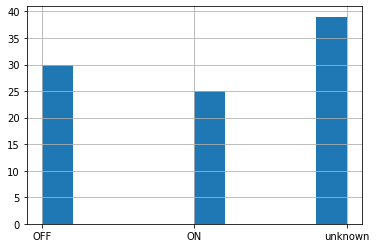

In [53]:
data["cell_type"].hist()
data["cell_type"].value_counts()

In [54]:
data.to_csv("data/{}_cell_type.csv".format(dataset_name), columns=["channel_name","cell_type"], index=None)

## 추가 정보 (Data_PSTH_CellType.xlsx)
																		
7	11	24			8	7	27			8	14	19			8	5	3
    

In [ ]:
# 1st set 
#data = pd.read_excel("data/cell_type.xlsx", usecols="A:D")  # 20180618
#data = pd.read_excel("data/cell_type.xlsx", usecols="F:I")   # 20190621
data = pd.read_excel("data/cell_type.xlsx", usecols="P:S")   # 20180626
# data.head()

columns = list(data.columns)

dataset_name = columns[0]
print(dataset_name)

columns[0] = "channel_name"

# remove ".XXX"
for i, col in enumerate(columns):
    idx = col.find(".")
    #print(idx)
    
    if idx > 0:
        columns[i] = col[:idx]
        #print(col[:idx])

data.columns = columns

# remove empty row
idx = pd.isna(data["channel_name"])
idx
data.drop(data.index[idx], inplace=True)

data

In [ ]:
idx_on = data["ON"] == "O"
idx_off = data["OFF"] == "O"
idx_on_off = data["ON/OFF"] == "O"


In [ ]:
# generate "cell_type" column
data["cell_type"] = "unknown"

data.loc[idx_on,"cell_type"] = "ON"
data.loc[idx_off,"cell_type"] = "OFF"
data.loc[idx_on_off,"cell_type"] = "ON/OFF"

data.head()


In [ ]:
data["cell_type"].hist()

In [ ]:
# save 
data.to_csv("data/{}_cell_type.csv".format(dataset_name), columns=["channel_name","cell_type"], index=None)

## more cell types

In [7]:
dataset_name = "20180618"
data = pd.read_excel("data/STA_CellType.xlsx", sheet_name=dataset_name, skiprows=[0])

columns = list(data.columns)
columns[0] = "channel_name"
data.columns = columns

# drop the last row
data.drop(data.index[len(data)-1], inplace=True)

data

,channel_name,ON,OFF,ON/OFF,Unknown
0,12a,NaN,O,NaN,NaN
1,12b,O,NaN,NaN,NaN
2,12c,NaN,NaN,NaN,O
3,13a,NaN,O,NaN,NaN
4,13b,O,NaN,NaN,NaN
...,...,...,...,...,...
113,84c,NaN,O,NaN,NaN
114,86a,NaN,NaN,NaN,O
115,86b,NaN,NaN,NaN,O
116,86c,NaN,NaN,NaN,O


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1034e2cd0>]],
      dtype=object)

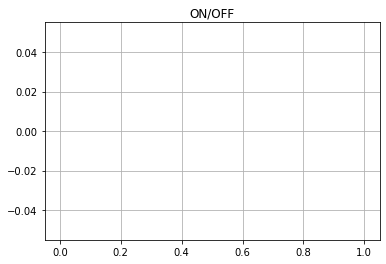

In [9]:
data.hist()